<a href="https://colab.research.google.com/github/Az-Data/Portfolio/blob/master/Languages%20of%20India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Languages of India

I was curious about what languages were spoken in different regions of India. I wanted to answer a couple of questions:

1) Is the most spoken language in India, popular in all regions of India?

To answer this question I will create an interactive bar chart to show the popularity of languages for each region.

2) What is the popularity of each language in different parts of India?

To answer this question I made a heat map using geographic data in conjunction with the census data. Using this interactive visual we can see how languages are localized to different parts of India. We can also understand why these languages are localized in such a way by looking at history and the geographical location of these region(s).

## Setup

In [ ]:
import requests
import os

# URL of the Python file in the GitHub repository
url = "https://raw.githubusercontent.com/Az-Data/Portfolio/master/utilities.py"
file_name = "utilities.py"  # Name to save the file locally

# Download the utilites file
response = requests.get(url)
if response.status_code == 200:
    with open(file_name, "wb") as f:
        f.write(response.content)
    print(f"{file_name} downloaded successfully.")
else:
    print("Failed to download the file.")

utilities.py downloaded successfully.


In [ ]:
# Using %run magic command
%%capture
%run utilities.py

## Execution

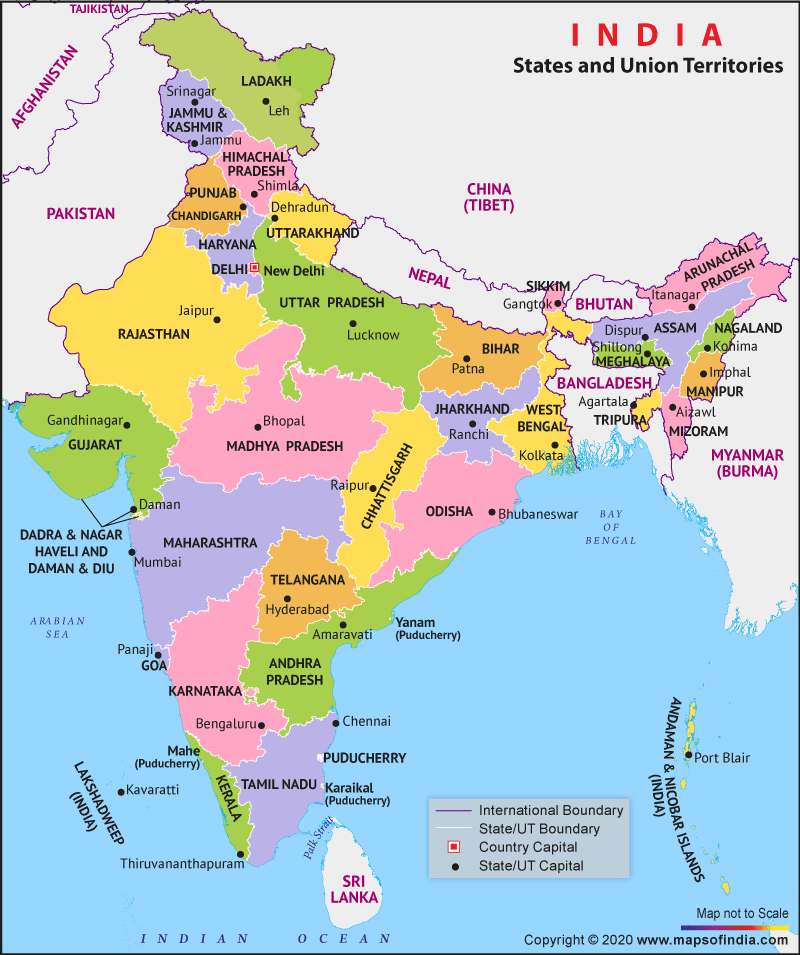

In [ ]:
from IPython.display import Image
# from https://www.mapsofindia.com/maps/india/india-political-map.htm
Image("Data/india-political-map.gif")

I have taken data from India's census from 2011. Using this data I can work out what is the most widely spoken languages of India. First, let's get the raw census data and put it into an organised dataframe.

*Data retrieved from from https://censusindia.gov.in/2011census/C-16.html*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')
import random
import geopandas as gp

plt.rcParams['figure.figsize'] = 15, 15

# widget packages
import ipywidgets as widgets

In [ ]:
# from https://censusindia.gov.in/2011census/C-16.html
df_og = pd.read_excel('Data/indianlanguages.xlsx')

I am only interested in the total column, so I will cull the data regarding gender or whether a person lived in a rural or urban setting. So let us simplify the dataframe a little.
Let's split this up into two dataframes one for all of India, and another for all the states and unions.

In [ ]:
languages = df_og.iloc[2:,:4]

languages[['Mother tongue code','Total']] = languages[['Mother tongue code', 'Total']].astype(int)

# The mother tongue codes which end in 000 are the parent languages, filter the dataframe by those
languages = languages[languages['Mother tongue code'].apply(lambda code: code % 1000 == 0)]
# Strip the numbers from the start of the 'Mother tongue name' column
languages['Mother tongue name'] = languages['Mother tongue name'].str.replace('\d+\s','', regex=True)
# drop the Mother tongue code column as it may be confusing because it is missing numbers 99000 & 110000
languages = languages[['Area name', 'Mother tongue name', 'Total']]
# stripping whitespaces in Mother tongue name column
languages['Mother tongue name'] = languages['Mother tongue name'].str.strip()


# languages of india as a whole
lang_of_india = languages[languages['Area name'] == 'INDIA'].reset_index(drop=True)

display(lang_of_india)

# languages of indian states
lang_indian_states = languages[languages['Area name'] != 'INDIA'].reset_index(drop=True)

display(lang_indian_states)

,Area name,Mother tongue name,Total
0,INDIA,ASSAMESE,15311351
1,INDIA,BENGALI,97237669
2,INDIA,BODO,1482929
3,INDIA,DOGRI,2596767
4,INDIA,GUJARATI,55492554
...,...,...,...
117,INDIA,YIMCHUNGRE,83259
118,INDIA,ZELIANG,63529
119,INDIA,ZEMI,50925
120,INDIA,ZOU,26545


,Area name,Mother tongue name,Total
0,JAMMU & KASHMIR,ASSAMESE,8340
1,JAMMU & KASHMIR,BENGALI,19830
2,JAMMU & KASHMIR,BODO,508
3,JAMMU & KASHMIR,DOGRI,2513712
4,JAMMU & KASHMIR,GUJARATI,19261
...,...,...,...
3111,ANDAMAN & NICOBAR ISLANDS,TRIPURI,26
3112,ANDAMAN & NICOBAR ISLANDS,VAIPHEI,5
3113,ANDAMAN & NICOBAR ISLANDS,ZEMI,2
3114,ANDAMAN & NICOBAR ISLANDS,ZOU,2


I will create a color palette where each language is assigned to a particular color. This will make the bars in the bar graph more distinguished. Some colours may look similar to others because there are over 100 distinct languages, not including dialects in these langauges (which I have omitted from the dataframe for simplicity).

In [ ]:
values = sns.color_palette("hsv", n_colors=122)
keys = list(lang_of_india['Mother tongue name'].unique())

# because there are so many languages I wanted to shuffle the color values
# so not too many similar colours are next to each other
random.seed(4)
random.shuffle(values)

color_dict = dict(zip(keys, values))

## Languages of India as a whole

**Is the most spoken language in India, the most popular in all regions of India?**

Here we will analyse the languages of india as a whole.

Just before we create some bar graphs, I will check if the populations in my dataframe match up with a simple google search of the population of India in 2011.

In [ ]:
# I simply sum the Total column.
display('Sum of the Total column: ' + str(sum(lang_of_india['Total'])))
display('Number of languages: ' + str(len(lang_of_india) - 1) + " (Not including the last entry which is just 'OTHER' languages)")

'Sum of the Total column: 1210854977'

"Number of languages: 121 (Not including the last entry which is just 'OTHER' languages)"

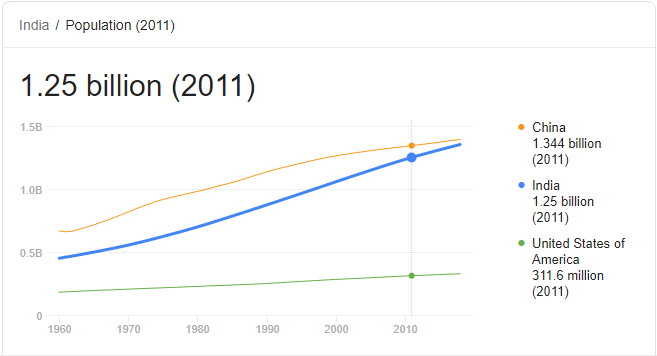

In [ ]:
# comparing the census data to a google search
Image('Data/GoogleSearchIndPop2011.PNG')

We have about 40 million people unaccounted for in this data from the census. This could be because some people did not take part in the census.

Now lets create a bar graph. Since there are 121 languages, I will just plot the top 20.

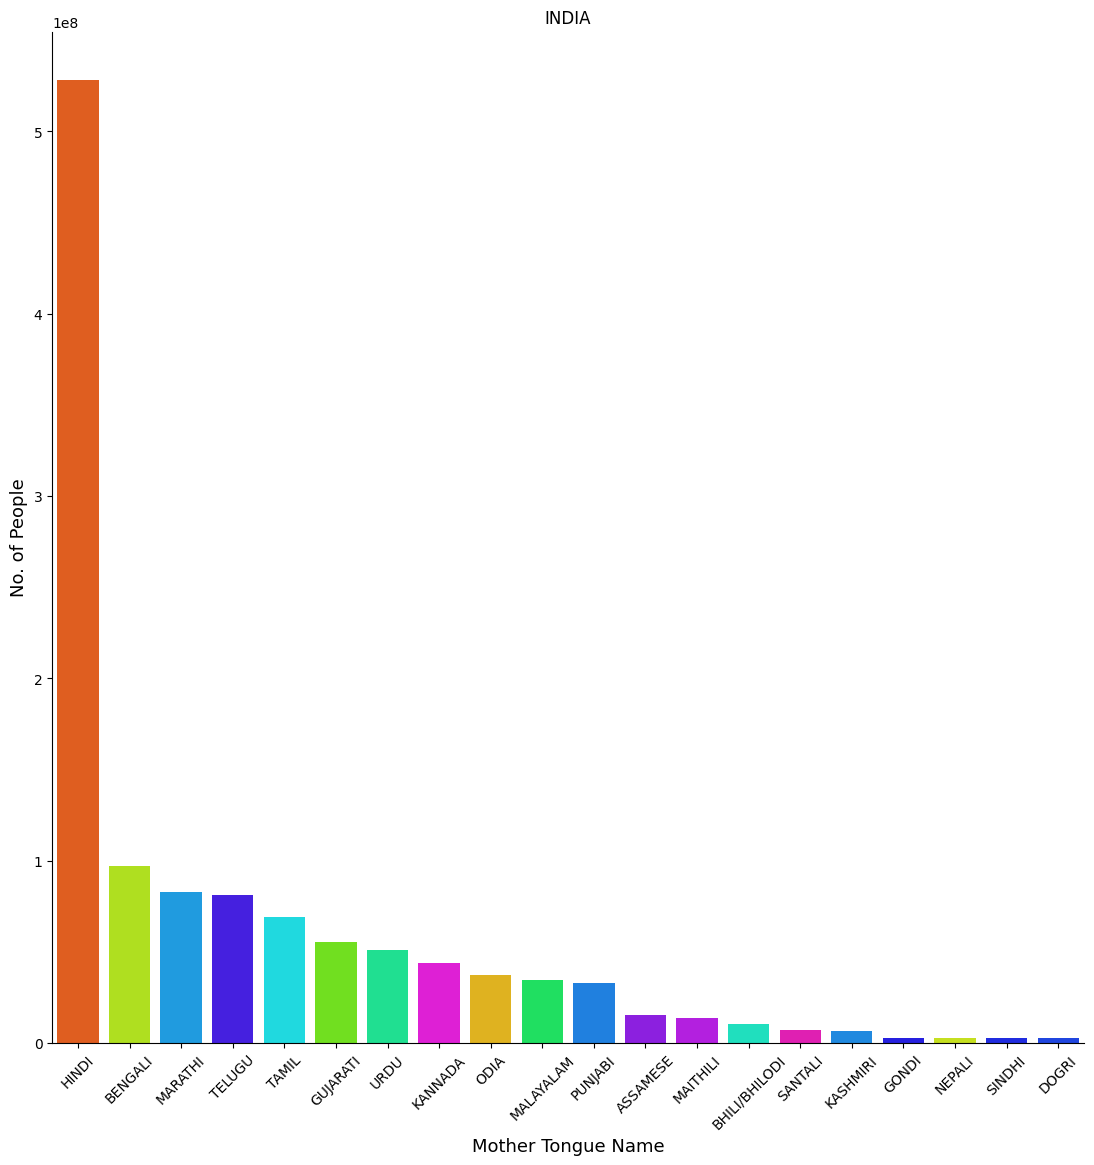

In [ ]:
def barplot_top_languages(dataset, No_of_bars=15, region='INDIA'):
    region_df = dataset[dataset['Area name'] == region].nlargest(No_of_bars, 'Total')
    sns.catplot(kind='bar',
            data=region_df,
            x='Mother tongue name',
            y='Total',
            height=11,
            palette=color_dict
           )
    plt.title(region)
    plt.xticks(rotation=45)
    plt.ylabel('No. of People', size=13)
    plt.xlabel('Mother Tongue Name', size=13)
    plt.show()

barplot_top_languages(lang_of_india, 20)

### Analysis

We can see that the most popular langauge of India is Hindi, spoken by 400 million people more than any other language. What is interesting is that Bengali is the second most popular language of India, though it originated from Bangladesh. Let's see if we can make a bar chart for each region in India to see what is the most popular language of each of these regions.

## India by region

There are 35 states/unions as of 2011 when the census took place. I will create a widget that makes a bar graph of the top 15 languages of that region. The widget will allow you to select a region from the drop down box before generating a graph.

In [ ]:
# len(lang_indian_states['Area name'].unique())

In [ ]:
region_options = list(lang_indian_states['Area name'].unique())

menu = widgets.Dropdown(
    options=region_options,
    value='GOA',
    description='Area name:',
    disabled=False,
)

def lang_region(region):
    barplot_top_languages(dataset = lang_indian_states, No_of_bars=15, region=region)

widgets.interact(lang_region, region=menu)


interactive(children=(Dropdown(description='Area name:', index=29, options=('JAMMU & KASHMIR', 'HIMACHAL PRADE…

<function __main__.lang_region(region)>

Finding out how many regions of India where Hindi is the most common language:

In [ ]:
hindi_most_pop_list = []

for region in region_options:
    region_df = lang_indian_states[lang_indian_states['Area name'] == region].nlargest(1, 'Total')
    if "HINDI" in region_df['Mother tongue name'].values:
        hindi_most_pop_list.append(region)

display(hindi_most_pop_list)

display('Count: ' + str(len(hindi_most_pop_list)))

['HIMACHAL PRADESH',
 'CHANDIGARH',
 'UTTARAKHAND',
 'HARYANA',
 'NCT OF DELHI',
 'RAJASTHAN',
 'UTTAR PRADESH',
 'BIHAR',
 'JHARKHAND',
 'CHHATTISGARH',
 'MADHYA PRADESH']

'Count: 11'

Finding out how many regions of India where Hindi is in the top 3 languages (if it is **not** the most popular language). i.e. 2nd or 3rd most popular language.

In [ ]:
hindi_pop_list = []

for region in region_options:
    region_df = lang_indian_states[lang_indian_states['Area name'] == region].nlargest(3, 'Total')
    if "HINDI" in region_df['Mother tongue name'].values:
        hindi_pop_list.append(region)

top3_hindi_pop = [x for x in hindi_pop_list if x not in hindi_most_pop_list]

display(top3_hindi_pop)

display('Count: ' + str(len(top3_hindi_pop)))

['JAMMU & KASHMIR',
 'PUNJAB',
 'SIKKIM',
 'TRIPURA',
 'ASSAM',
 'WEST BENGAL',
 'ODISHA',
 'GUJARAT',
 'DAMAN & DIU',
 'DADRA & NAGAR HAVELI',
 'MAHARASHTRA',
 'ANDHRA PRADESH',
 'GOA',
 'ANDAMAN & NICOBAR ISLANDS']

'Count: 14'

### Analysis

To answer my question, the most spoken language in India is not popular in all regions of India. The interactive bar graph shows that different languages are more popular than others depending on the region of India.  
It is interesting to see that there is only 11/35 regions of India where Hindi is the most popular language, and a further 14 other regions were Hindi is the second or third most popular language. That means that there are 10/35 regions where Hindi is not even in the top 3 languages spoken in that region. I will now determine if there are pockets of particular languages that are localized to parts of India. If so how are they localized.

## Shape map of popularity of all languages

I have acquired some map data in a shape file of all the Indian states and unions. I will use this data in conjunction with the processed census data to create a shape map of the popularity of a particular language for each region. To organise my information I will create a heat map widget. The map data may not be to scale, it is merely symbolic so you can visualize the spread.

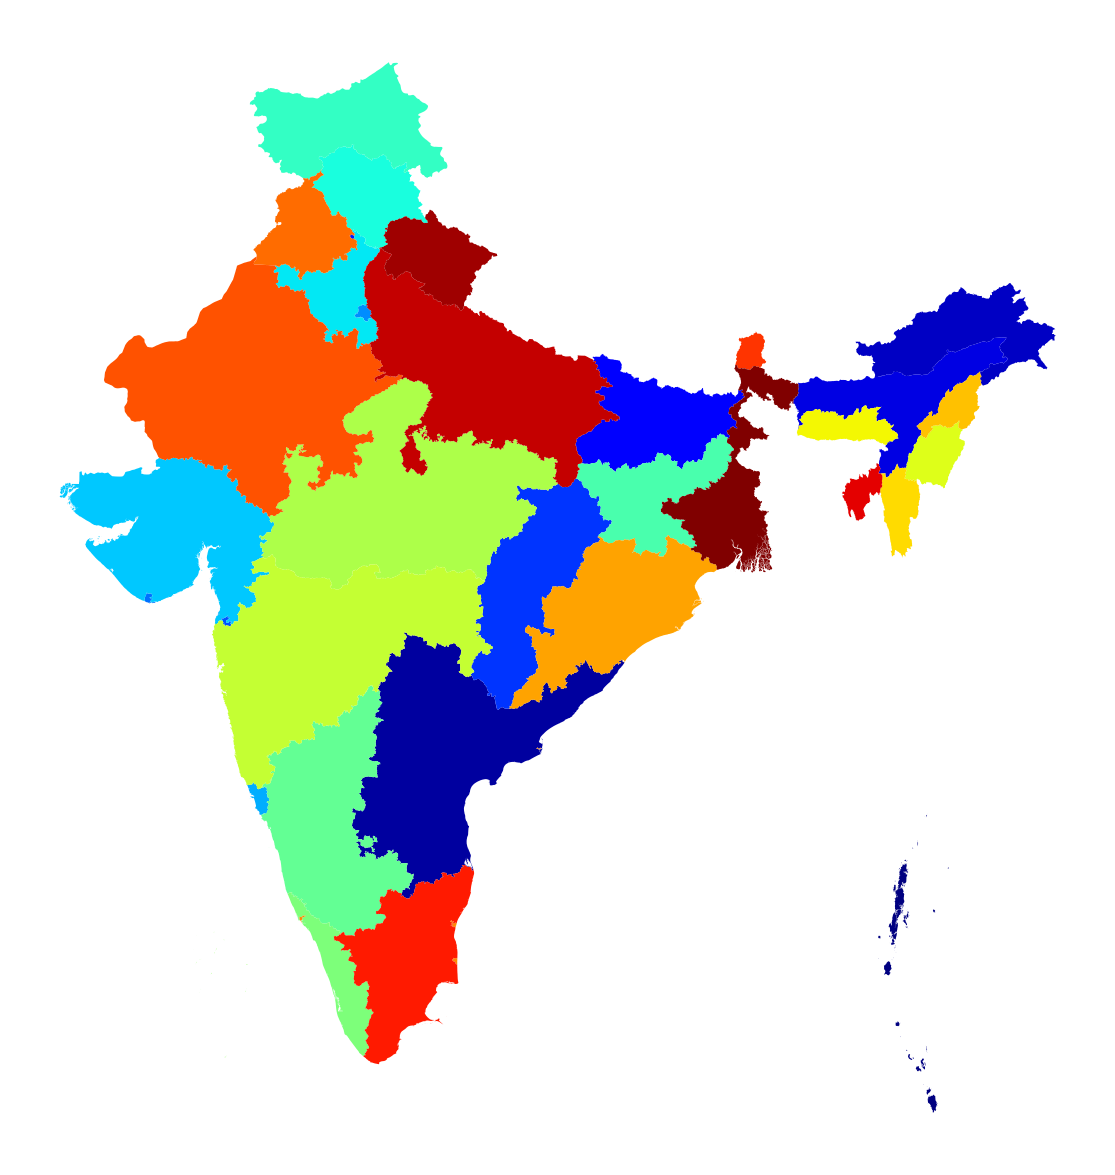

In [ ]:
india_map = gp.read_file('Data/states/IND_adm1.shp')
india_map.plot(cmap='jet', figsize=(15,15))
plt.axis('off')
plt.show()

In [ ]:
# Clean up useless columns in india_map dataframe
clean_map = india_map[['NAME_1', 'ENGTYPE_1', 'Shape_Leng', 'Shape_Area', 'geometry']]

# finding out the total number of people in each area
tot_per_area = lang_indian_states.groupby('Area name', as_index=False)[['Total']].sum()

# making sure the area names in both dataframes match
clean_map.rename(columns={'NAME_1':'Area name', 'ENGTYPE_1':'Territory type'}, inplace=True)

clean_map['Area name'] = clean_map['Area name'].str.upper()
clean_map['Area name'] = clean_map['Area name'].str.replace(' AND ', ' & ')

# inconsistent Area names in clean_map were replaced with the corresponding names from the census data
# UTTARAKHAND (formally know as UTTARANCHAL) & ODISHA (formally known as ORISSA) had to be changed
clean_to_censusDict = {'ANDAMAN & NICOBAR': 'ANDAMAN & NICOBAR ISLANDS',
                       'DELHI': 'NCT OF DELHI',
                      'ORISSA': 'ODISHA',
                      'UTTARANCHAL': 'UTTARAKHAND'}

clean_map.replace({'Area name' : clean_to_censusDict}, inplace=True)


# Mergeing the two dataframes
clean_map_tot = pd.merge(clean_map, tot_per_area, on='Area name')

clean_map_tot.head()

,Area name,Territory type,Shape_Leng,Shape_Area,geometry,Total
0,ANDAMAN & NICOBAR ISLANDS,Union Territory,33.514047,0.630484,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",380581
1,ANDHRA PRADESH,State,58.916311,23.281297,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",84580777
2,ARUNACHAL PRADESH,State,24.851991,7.529301,"POLYGON ((96.15778 29.3831, 96.1638 29.37668, ...",1383727
3,ASSAM,State,28.542964,7.091458,"MULTIPOLYGON (((89.87145 25.5373, 89.87118 25....",31205576
4,BIHAR,State,25.980049,8.475058,"POLYGON ((84.11342 27.51544, 84.11881 27.51397...",104099452


Finding the top three languages in all states, and creating a list of these languages (with no duplicates).

In [ ]:
'''
Use a for loop and the names of all the states in lang_indian_states
to merge them into a single list, and find the unique languages top_languages
'''

def top3(area_name):
    toplangs = lang_indian_states[lang_indian_states['Area name'] == area_name].nlargest(3, 'Total')
    return list(toplangs['Mother tongue name'].values)


all_top_lang = []

for area in list(lang_indian_states['Area name'].unique()):
    all_top_lang.extend(top3(area))

all_top_lang = list(dict.fromkeys(all_top_lang))

#display(all_top_lang)

I have merged the geographical shape file with the census data and created the resulting dataframe. In this dataframe I have listed all the most popular languages of each region, and calculated the percentage speaking portion of that language in every region.

In [ ]:
'''
With a for loop I calculated the percent of spoken language per area of the most popular languages in
India (all_top_lang list). Using the lang_indian_state df I was able to extend the clean_map_tot df with the percent of
the population of that state/union spoke a particular language
'''

# Loop through the list of the most popular languages in India
# Then I extended the clean_map_tot dataframe to contain column everyone of these languages
# lastly I divided the amount people that spoke that language by the population of that state


for lang in all_top_lang:
    temp = lang_indian_states[lang_indian_states['Mother tongue name'] == lang].rename(columns={'Total': lang})
    clean_map_tot = pd.merge(clean_map_tot, temp[['Area name', lang]], on='Area name', how='outer')
    clean_map_tot[lang] = clean_map_tot[lang]/clean_map_tot['Total'] * 100

clean_map_tot.replace(np.nan, 0, inplace=True)
#display(clean_map_tot.head())

Here is the resulting heat map of the above dataframe. I picked this particular color scheme for the heat map, because it was the easiest to distinguish between colours, especially of those that have a really low popularity.

In [ ]:
select_menu = widgets.Select(
    options=all_top_lang,
    value='HINDI',
    description='Language:',
    disabled=False,
    rows=7
    )

def popularity_plot(language):
    fig, ax = plt.subplots(1, 1)

    clean_map_tot.plot(column=language,
                       cmap='RdYlGn',
                       ax=ax,
                       legend=True,
                       legend_kwds={'label': "Popularity in %"},
                       vmax=100,
                       vmin=0,
                       linewidth=0.1,
                       edgecolor='grey')
    plt.title(language)
    plt.axis('off')
    plt.show()


widgets.interact(popularity_plot, language=select_menu)

interactive(children=(Select(description='Language:', index=1, options=('KASHMIRI', 'HINDI', 'DOGRI', 'PUNJABI…

<function __main__.popularity_plot(language)>

### Analysis & Conclusion
This heat map shows how widely spoken the top 3 languages for each region are compared to the rest of india. It is interesting to see the concentrations of these languages spoken localized to different parts of the country. Even Hindi, the most widely spoken langauge in India, is mainly spoken in the north of India. Languages such as Bengali, the second most popular language in India, has its popularity localized around Bangladesh. This heatmap shows the popularity of each language in different parts of India. There is a story behind the spread and localization of each of these languages and I hope this heat map brings a little visual prespective to these stories.  